In [25]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tables
from phd.utils.path_tools import find_by_meta
from tabulate import tabulate
from scipy.stats import describe
from scipy.optimize import curve_fit


# Востановление точек с графика из статьи 2003 года

In [62]:
path = "/mnt/storage2/phd/data/thunderstorm/Graph/Dwyer2003.dat"

In [63]:
with open(path) as fin:
    text = fin.read()
    text = text.replace(",", ".")
    text = text.split("\n")
    data = [[float(i) for i in line.split()] for line in text[:-1]]

In [64]:
data = np.array(data)
print(data)

[[  18.3872224  2559.54804209]
 [  19.51293423 2453.14818009]
 [  20.40221967 2357.30550285]
 [  22.97684119 2197.98171468]
 [  25.11886432 2059.77229602]
 [  27.4605782  1953.64843885]
 [  30.46989571 1794.18664827]
 [  36.96084874 1582.07693635]
 [  43.52208346 1433.86234259]
 [  54.38559334 1275.50457133]
 [  66.95861341 1138.39917199]
 [  87.48538027  991.15059514]
 [ 119.51415764  855.0112127 ]
 [ 153.84974267  761.10056926]
 [ 216.51294682  646.62756598]
 [ 328.19278725  554.23494911]
 [ 428.80324625  481.85268242]
 [ 543.85593337  441.2799724 ]
 [ 679.60734588  411.26444713]
 [ 824.38300922  391.66810419]
 [ 901.23637005  381.80093152]
 [ 970.72625087  382.49094359]]


In [65]:
data = data[3:]

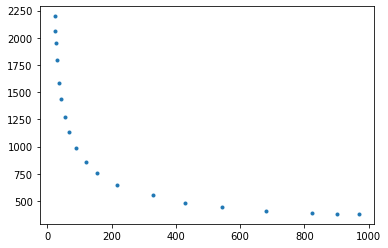

In [66]:
plt.plot(data[:,0], data[:,1], ".")
# plt.xscale("log")

In [52]:
def power(x, alpha, const, back):
    return const*np.exp(-x/alpha) + back

In [55]:
popt, _ = curve_fit(power, xdata=data[:,0], ydata=data[:, 1], p0=[100, 2000, 500])


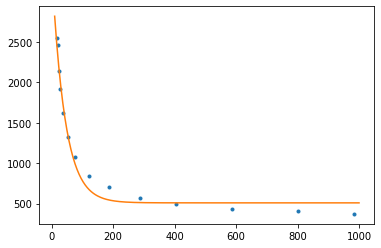

In [56]:
x = np.linspace(10,1000, 300)
plt.plot(data[:,0], data[:,1], ".")
plt.plot(x, power(x, *popt))
# plt.xscale("log")

In [57]:
popt

array([  42.341824  , 2921.42285372,  508.61416103])

In [58]:
x = np.arange(100, 1001, 100)
y  = power(x, *popt)

In [61]:
for i,j in zip(x,y):
    print(i,j)

100 783.9784797005914
200 534.5691534425279
300 511.06059866172933
400 508.84475470684055
500 508.63589608162096
600 508.6162097110025
700 508.6143541343524
800 508.6141792334135
900 508.6141627477898
1000 508.6141611939057


# Анализ


In [67]:
path = "/home/zelenyy/data/thunderstorm/result.hdf5"

In [75]:
def process(path, target_node="gamma"):
    field = []
    length = []
    number = []
    # plt.figure(figsize=(10,10))
    first = True
    with tables.open_file(path) as h5file:
        for i, group in enumerate(h5file.root):
            table = h5file.get_node(group, target_node)
            if first:
                first = False
                print("Primry particle: {}".format(table.attrs["values_macros_particle"]))
            
            field.append(table.attrs["values_gdml_fieldValueZ"]*1e3/1e-1)
            length.append(table.attrs["values_gdml_cellHeight"])
            number.append(table.nrows/table.attrs["values_macros_number"])
    # plt.plot(field, number, "*")
    print(max(number))
    plt.plot(length, number, "*")

Primry particle: e-
1697.0


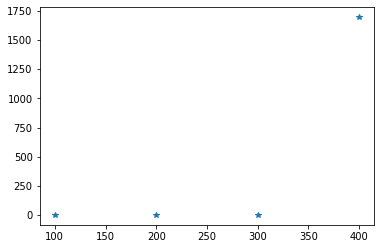

In [76]:
process(path)

Primry particle: e-
1729.8


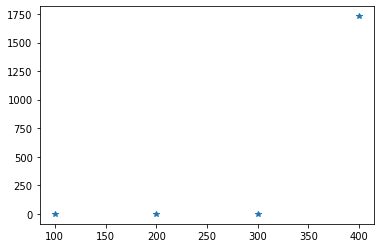

In [77]:
process(path, target_node="positron")

In [96]:
def polar(path, target_node="gamma", cellHeight = 400):
    paths = find_by_meta(path,target_node=target_node, values_gdml_cellHeight=cellHeight)
    plt.figure(figsize=(10,10))
    with tables.open_file(path) as h5file:
        for i, path in enumerate(paths):
            table = h5file.get_node(path)
            data = table.read()
            
            indx = data["energy"] < 1
            ax = plt.subplot(221, projection='polar')
            ax.plot(data["theta"][indx], data["energy"][indx], ".")
            ax.set_theta_zero_location("N")  # theta=0 at the top
            ax.set_theta_direction(-1) 
            
            indx = np.logical_and(data["energy"] > 1, data["energy"] < 10)
            ax = plt.subplot(222, projection='polar')
            ax.plot(data["theta"][indx], data["energy"][indx], ".")
            ax.set_theta_zero_location("N")  # theta=0 at the top
            ax.set_theta_direction(-1) 
            
            indx = data["energy"] > 10
            ax = plt.subplot(223, projection='polar')
            ax.plot(data["theta"][indx], data["energy"][indx], ".")
            ax.set_theta_zero_location("N")  # theta=0 at the top
            ax.set_theta_direction(-1) 
            

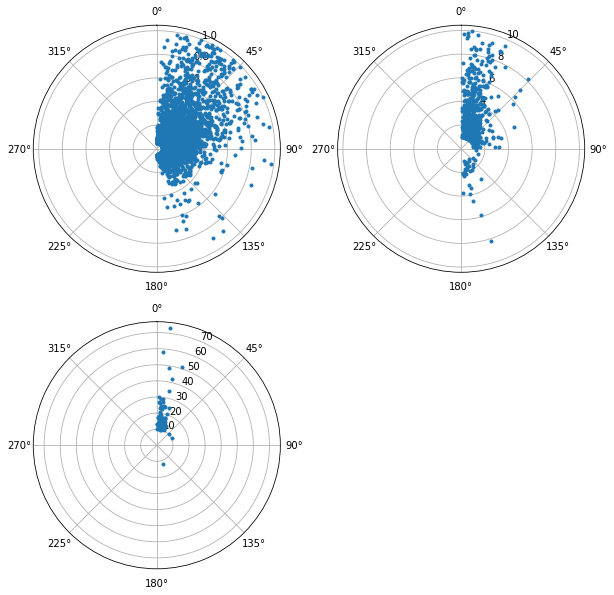

In [97]:
polar(path)

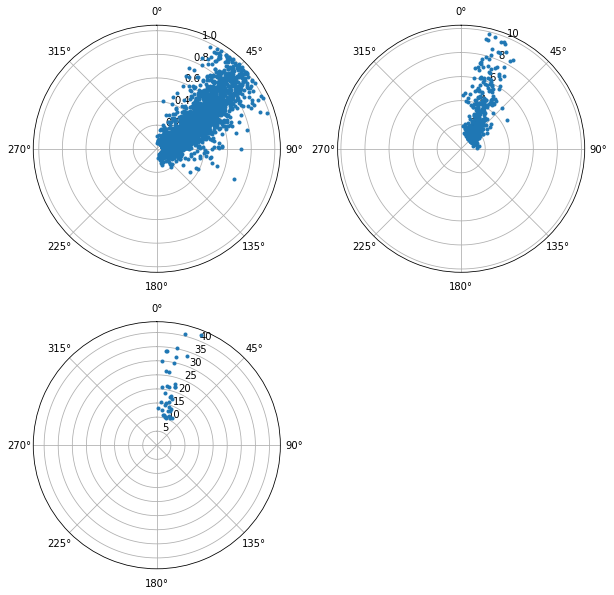

In [98]:
polar(path, target_node="positron")

